In [4]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import time
import csv
import re
import pandas as pd
from scipy.stats import t
import math
%config InlineBackend.figure_format = 'svg'
N_sample = 380
t_alpha = t.ppf(0.975, df=N_sample, loc=0, scale=1)
result = pd.read_csv('game_result_500.csv')
del result['Unnamed: 0']
result = np.matrix(result.values)
result = np.transpose(result)
result.shape

(21, 380)

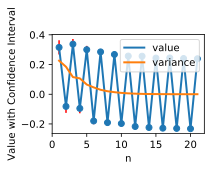

In [5]:
#fig.1
x = np.arange(1, 22)
y = np.mean(result, axis=1)
y = y
v = np.var(result, axis=1)
v = v
sd = np.std(result, axis = 1)
sd = sd
error_bar = t_alpha*sd/math.sqrt(N_sample)
plt.xlabel('n')
plt.ylabel('Value with Confidence Interval')
line1 = plt.plot(x, y, linewidth=2.0,label='value')
plt.legend()
lin2 = plt.errorbar(x, y, yerr = error_bar,ecolor='red',fmt='o')
plt.plot(x, v, linewidth=2.0,label='variance')
plt.legend(loc='upper right')
foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('plot1.eps', format='eps', dpi=1000)
plt.show()

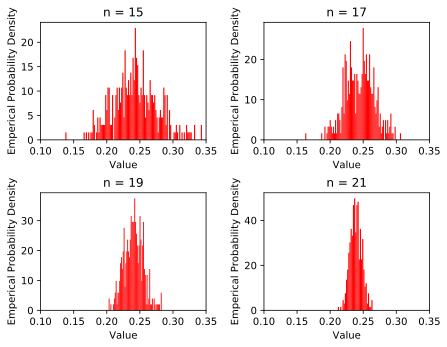

In [23]:
#Fig.2
plt.figure(1)
plt.subplot(224)
num_bins = 30
data = np.asarray(result[20]).reshape(-1)
x = np.linspace(min(data), max(data), 100)
mean = np.mean(data)
sigma = np.std(data)
N, bins, patches = plt.hist(data,num_bins, normed = True, color = 'red')
#plt.plot(x, mlab.normpdf(x, mean, sigma),color = 'red', label = 'Fitted PDF')
plt.xlabel('Value')
plt.ylabel('Emperical Probability Density')
plt.title('n = 21')
plt.xlim([0.1,0.35])
#plt.legend(loc = 'upper right')

plt.subplot(223)
num_bins = 60
data = np.asarray(result[18]).reshape(-1)
x = np.linspace(min(data), max(data), 100)
mean = np.mean(data)
sigma = np.std(data)
N, bins, patches = plt.hist(data,num_bins, normed = True, color = 'red')
plt.xlabel('Value')
plt.ylabel('Emperical Probability Density')
plt.title('n = 19')
plt.xlim([0.1,0.35])
#plt.legend(loc = 'upper right')

plt.subplot(222)
num_bins = 90
data = np.asarray(result[16]).reshape(-1)
x = np.linspace(min(data), max(data), 100)
mean = np.mean(data)
sigma = np.std(data)
N, bins, patches = plt.hist(data,num_bins, normed = True,color = 'red')
plt.xlabel('Value')
plt.ylabel('Emperical Probability Density')
plt.title('n = 17')
plt.xlim([0.1,0.35])
#plt.legend(loc = 'upper right')

plt.subplot(221)
num_bins = 120
data = np.asarray(result[14]).reshape(-1)
x = np.linspace(min(data), max(data), 100)
mean = np.mean(data)
sigma = np.std(data)
N, bins, patches = plt.hist(data,num_bins, normed = True,color = 'red')
plt.xlabel('Value')
plt.ylabel('Emperical Probability Density')
plt.title('n = 15')
#plt.legend(loc = 'upper right')
plt.xlim([0.1,0.35])
plt.subplots_adjust(top=1, bottom=0.00, left=0.05, right=0.95, hspace=0.45,
                    wspace=0.35)
foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('plot2.eps', format='eps', dpi=1000)
plt.show()

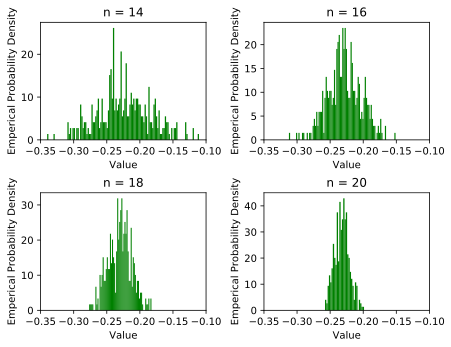

In [18]:
#Fig 3
plt.figure(1)
num_bins = 30
plt.subplot(224)
data = np.asarray(result[19]).reshape(-1)
x = np.linspace(min(data), max(data), 100)
mean = np.mean(data)
sigma = np.std(data)
num_bins = 30
N, bins, patches = plt.hist(data,num_bins, normed = True,color = 'green')
#plt.plot(x, mlab.normpdf(x, mean, sigma),color = 'green', label = 'Fitted PDF')
#plt.errorbar((bins1[1:]+bins1[:-1])/2, density, yerr = error_bar,ecolor='red',fmt='o',label='Confidence Interval')
plt.xlabel('Value')
plt.ylabel('Emperical Probability Density')
plt.title('n = 20')
plt.xlim([-0.35,-0.1])
#plt.legend()

plt.subplot(223)
data = np.asarray(result[17]).reshape(-1)
x = np.linspace(min(data), max(data), 100)
mean = np.mean(data)
sigma = np.std(data)
num_bins = 60
N, bins, patches = plt.hist(data,num_bins, normed = True,color = 'green')
#plt.plot(x, mlab.normpdf(x, mean, sigma),color = 'green', label = 'Fitted PDF')
plt.xlabel('Value')
plt.ylabel('Emperical Probability Density')
plt.title('n = 18')
plt.xlim([-0.35,-0.1])
#plt.legend()

plt.subplot(222)
data = np.asarray(result[15]).reshape(-1)
x = np.linspace(min(data), max(data), 100)
mean = np.mean(data)
sigma = np.std(data)
num_bins = 90
N, bins, patches = plt.hist(data,num_bins, normed = True,color = 'green')
#plt.plot(x, mlab.normpdf(x, mean, sigma),color = 'green', label = 'Fitted PDF')
plt.xlabel('Value')
plt.ylabel('Emperical Probability Density')
plt.title('n = 16')
plt.xlim([-0.35,-0.1])
#plt.legend()

plt.subplot(221)
data = np.asarray(result[13]).reshape(-1)
x = np.linspace(min(data), max(data), 100)
mean = np.mean(data)
sigma = np.std(data)
num_bins = 120
N, bins, patches = plt.hist(data,num_bins, normed = True,color = 'green')
#plt.plot(x, mlab.normpdf(x, mean, sigma),color = 'green', label = 'Fitted PDF')
plt.xlabel('Value')
plt.ylabel('Emperical Probability Density')
plt.title('n = 14')
plt.xlim([-0.35,-0.1])
#plt.legend()

plt.subplots_adjust(top=1, bottom=0.00, left=0.05, right=0.95, hspace=0.45,
                    wspace=0.35)
#plt.tight_layout()
foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('plot3.eps', format='eps', dpi=1000)
plt.show()

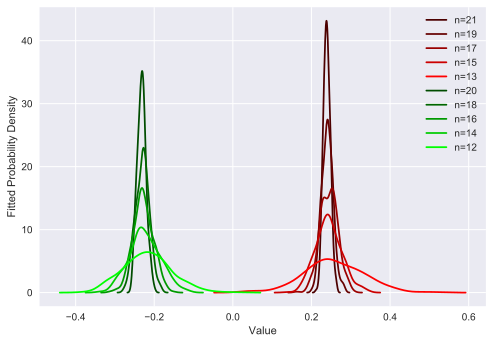

In [24]:
#Fig.4
import seaborn as sns
#plt.hist(result[9], bins=[0.1,0.2,0.3,0.4,.5,.6,.7,.8,.sns.distplot(result[19], bins = 20,hist = False)
#sns.distplot(result[19], bins = 15, hist=False, kde=True, label = 'n=20', color = 'red')
ax1 = sns.distplot(np.asarray(result[20].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=21', color = (.3,0,0))
#sns.plt.errorbar((bins1[1:]+bins1[:-1])/2, density, yerr = error_bar,ecolor='red',fmt='o')
sns.distplot(np.asarray(result[18].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=19', color = (.4,0,0))
sns.distplot(np.asarray(result[16].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=17', color = (.6,0,0))
sns.distplot(np.asarray(result[14].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=15', color = (.8,0,0))
sns.distplot(np.asarray(result[10].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=13', color = (1,0,0))
sns.distplot(np.asarray(result[19].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=20', color = (0,.3,0))
sns.distplot(np.asarray(result[17].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=18', color = (0,.4,0))
sns.distplot(np.asarray(result[15].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=16', color = (0,.6,0))
sns.distplot(np.asarray(result[13].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=14', color = (0,.8,0))
sns.distplot(np.asarray(result[11].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=12', color = (0,1,0))

sns.plt.legend()
sns.plt.xlabel('Value')
sns.plt.ylabel('Fitted Probability Density')
foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('plot4.eps', format='eps', dpi=1000)
plt.show()

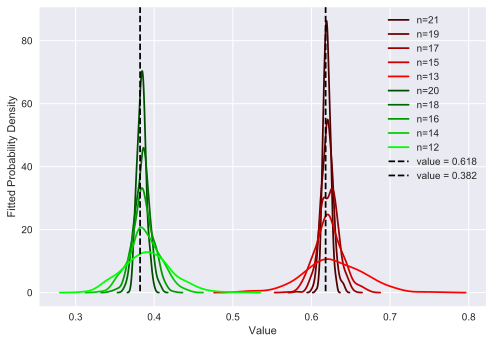

In [25]:
# Fig 5
N_sample = 500
t_alpha = t.ppf(0.975, df=N_sample, loc=0, scale=1)
result = pd.read_csv('game_result_500.csv')
del result['Unnamed: 0']
%config InlineBackend.figure_format = 'svg'
#np.matrix: every row is the matrix row in the [], not the vector(which I always assume a column).
#0 is colunm and 1 is row
result = np.matrix(result.values)
result = np.transpose(result)
result1 = (result+1)/2
ax1 = sns.distplot(np.asarray(result1[20].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=21', color = (.3,0,0))
sns.distplot(np.asarray(result1[18].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=19', color = (.4,0,0))
sns.distplot(np.asarray(result1[16].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=17', color = (.6,0,0))
sns.distplot(np.asarray(result1[14].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=15', color = (.8,0,0))
sns.distplot(np.asarray(result1[10].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=13', color = (1,0,0))
sns.distplot(np.asarray(result1[19].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=20', color = (0,.3,0))
sns.distplot(np.asarray(result1[17].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=18', color = (0,.4,0))
sns.distplot(np.asarray(result1[15].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=16', color = (0,.6,0))
sns.distplot(np.asarray(result1[13].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=14', color = (0,.8,0))
sns.distplot(np.asarray(result1[11].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=12', color = (0,1,0))
sns.plt.axvline(x=0.618, color = 'black', ls = '--',ymin=0.05, ymax=1, label = 'value = 0.618')
sns.plt.axvline(x=0.382, color = 'black',ls = '--', ymin=0.05, ymax=1, label = 'value = 0.382')
sns.plt.legend()
sns.plt.xlabel('Value')
sns.plt.ylabel('Fitted Probability Density')
foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('plot5.eps', format='eps', dpi=1000)
plt.show()

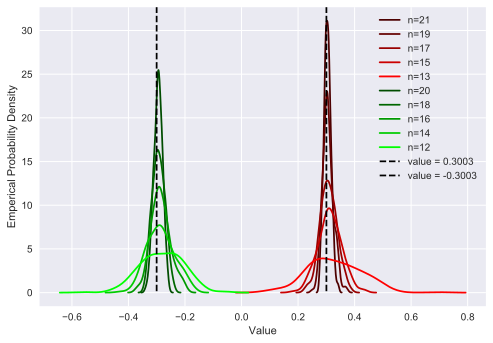

In [26]:
# Fig 6
N_sample = 228
t_alpha = t.ppf(0.975, df=N_sample, loc=0, scale=1)
result_g = pd.read_csv('game_result_227_g.csv')
del result_g['Unnamed: 0']
%config InlineBackend.figure_format = 'svg'
#np.matrix: every row is the matrix row in the [], not the vector(which I always assume a column).
#0 is colunm and 1 is row
result_g = np.matrix(result_g.values)
result_g = np.transpose(result_g)
import seaborn as sns
result2 = result_g
ax1 = sns.distplot(np.asarray(result2[20].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=21', color = (.3,0,0))
sns.distplot(np.asarray(result2[18].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=19', color = (.4,0,0))
sns.distplot(np.asarray(result2[16].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=17', color = (.6,0,0))
sns.distplot(np.asarray(result2[14].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=15', color = (.8,0,0))
sns.distplot(np.asarray(result2[10].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=13', color = (1,0,0))
sns.distplot(np.asarray(result2[19].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=20', color = (0,.3,0))
sns.distplot(np.asarray(result2[17].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=18', color = (0,.4,0))
sns.distplot(np.asarray(result2[15].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=16', color = (0,.6,0))
sns.distplot(np.asarray(result2[13].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=14', color = (0,.8,0))
sns.distplot(np.asarray(result2[11].reshape(-1)), bins = 15, hist=False, kde=True, label = 'n=12', color = (0,1,0))
sns.plt.xlabel('Value')
sns.plt.ylabel('Emperical Probability Density')
sns.plt.axvline(x=0.3003, color = 'black',ls = '--', ymin=0.05, ymax=1, label = 'value = 0.3003')
sns.plt.axvline(x=-0.3003, color = 'black',ls = '--', ymin=0.05, ymax=1, label = 'value = -0.3003')
sns.plt.legend()
foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('plot6.eps', format='eps', dpi=1000)
plt.show()

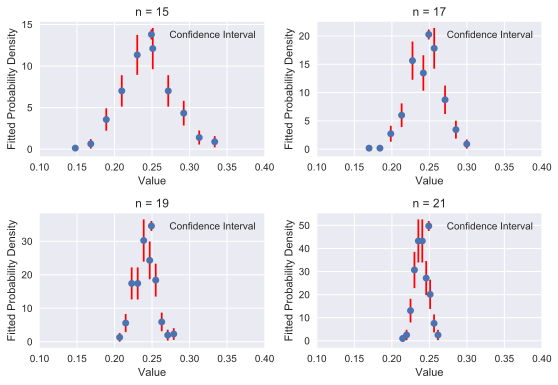

In [27]:
plt.figure(1)
N_sample = 380
point_odd = []
plt.subplot(224)
data1 = np.asarray(result[20]).reshape(-1)
N1, bins1, patches = ax1.hist(data1)
error_bar = (2*np.sqrt(N1))/((bins1[1:]-bins1[:-1])*N_sample)
density = (N1/N_sample)/(bins1[1:]-bins1[:-1])
max_id = np.argmax(density)
estimate_bin = (bins1[1:]+bins1[:-1])/2
#estimate_pointdensity = np.mean(density[(estimate_bin>0.6) & (estimate_bin<0.65)])
point_odd.append(estimate_bin[max_id])
plt.errorbar((bins1[1:]+bins1[:-1])/2, density, yerr = error_bar,ecolor='red',fmt='o', label="Confidence Interval")
plt.xlabel('Value')
plt.ylabel('Fitted Probability Density')
plt.title('n = 21')
plt.xlim([0.1,0.4])
plt.legend()

plt.subplot(223)
data1 = np.asarray(result[18]).reshape(-1)
N1, bins1, patches = ax1.hist(data1)
error_bar = (2*np.sqrt(N1))/((bins1[1:]-bins1[:-1])*N_sample)
density = (N1/N_sample)/(bins1[1:]-bins1[:-1])
max_id = np.argmax(density)
estimate_bin = (bins1[1:]+bins1[:-1])/2
#estimate_pointdensity = np.mean(density[(estimate_bin>0.6) & (estimate_bin<0.65)])
point_odd.append(estimate_bin[max_id])
plt.errorbar((bins1[1:]+bins1[:-1])/2, density, yerr = error_bar,ecolor='red',fmt='o', label="Confidence Interval")
plt.xlabel('Value')
plt.ylabel('Fitted Probability Density')
plt.title('n = 19')
plt.xlim([0.1,0.4])
plt.legend()

plt.subplot(222)
data1 = np.asarray(result[16]).reshape(-1)
N1, bins1, patches = ax1.hist(data1)
error_bar = (2*np.sqrt(N1))/((bins1[1:]-bins1[:-1])*N_sample)
density = (N1/N_sample)/(bins1[1:]-bins1[:-1])
max_id = np.argmax(density)
estimate_bin = (bins1[1:]+bins1[:-1])/2
#estimate_pointdensity = np.mean(density[(estimate_bin>0.6) & (estimate_bin<0.65)])
point_odd.append(estimate_bin[max_id])
plt.errorbar((bins1[1:]+bins1[:-1])/2, density, yerr = error_bar,ecolor='red',fmt='o', label="Confidence Interval")
plt.xlabel('Value')
plt.ylabel('Fitted Probability Density')
plt.title('n = 17')
plt.xlim([0.1,0.4])
plt.legend()

plt.subplot(221)
data1 = np.asarray(result[14]).reshape(-1)
N1, bins1, patches = ax1.hist(data1)
error_bar = (2*np.sqrt(N1))/((bins1[1:]-bins1[:-1])*N_sample)
density = (N1/N_sample)/(bins1[1:]-bins1[:-1])
max_id = np.argmax(density)
estimate_bin = (bins1[1:]+bins1[:-1])/2
#estimate_pointdensity = np.mean(density[(estimate_bin>0.6) & (estimate_bin<0.65)])
point_odd.append(estimate_bin[max_id])
plt.errorbar((bins1[1:]+bins1[:-1])/2, density, yerr = error_bar,ecolor='red', fmt='o', label="Confidence Interval")
plt.xlabel('Value')
plt.ylabel('Fitted Probability Density')
plt.title('n = 15')
plt.xlim([0.1,0.4])
plt.legend()
plt.subplots_adjust(top=1, bottom=0.00, left=0.10, right=0.90, hspace=0.25,
                    wspace=0.35)
plt.tight_layout()
foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('plot_unused_1.eps', format='eps', dpi=1000)
plt.show()

In [26]:
point_odd

[0.23530250208304881,
 0.23887407740609765,
 0.2564257208288383,
 0.25093592217545702]

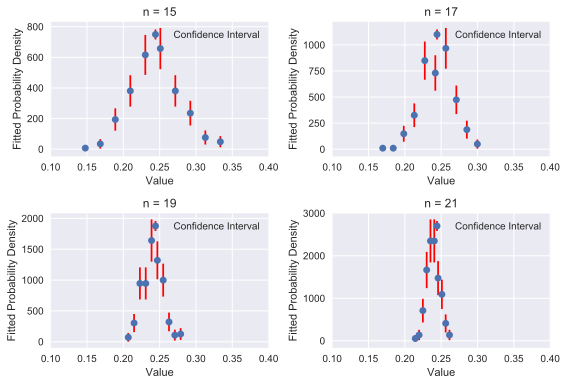

In [28]:
plt.figure(1)
N_sample = 7
point_odd = []
plt.subplot(224)
data1 = np.asarray(result[20]).reshape(-1)
N1, bins1, patches = ax1.hist(data1)
error_bar = (2*np.sqrt(N1))/((bins1[1:]-bins1[:-1])*N_sample)
density = (N1/N_sample)/(bins1[1:]-bins1[:-1])
max_id = np.argmax(density)
estimate_bin = (bins1[1:]+bins1[:-1])/2
#estimate_pointdensity = np.mean(density[(estimate_bin>0.6) & (estimate_bin<0.65)])
point_odd.append(estimate_bin[max_id])
plt.errorbar((bins1[1:]+bins1[:-1])/2, density, yerr = error_bar,ecolor='red',fmt='o', label="Confidence Interval")
plt.xlabel('Value')
plt.ylabel('Fitted Probability Density')
plt.title('n = 21')
plt.xlim([0.1,0.4])
plt.legend()

plt.subplot(223)
data1 = np.asarray(result[18]).reshape(-1)
N1, bins1, patches = ax1.hist(data1)
error_bar = (2*np.sqrt(N1))/((bins1[1:]-bins1[:-1])*N_sample)
density = (N1/N_sample)/(bins1[1:]-bins1[:-1])
max_id = np.argmax(density)
estimate_bin = (bins1[1:]+bins1[:-1])/2
#estimate_pointdensity = np.mean(density[(estimate_bin>0.6) & (estimate_bin<0.65)])
point_odd.append(estimate_bin[max_id])
plt.errorbar((bins1[1:]+bins1[:-1])/2, density, yerr = error_bar,ecolor='red',fmt='o', label="Confidence Interval")
plt.xlabel('Value')
plt.ylabel('Fitted Probability Density')
plt.title('n = 19')
plt.xlim([0.1,0.4])
plt.legend()

plt.subplot(222)
data1 = np.asarray(result[16]).reshape(-1)
N1, bins1, patches = ax1.hist(data1)
error_bar = (2*np.sqrt(N1))/((bins1[1:]-bins1[:-1])*N_sample)
density = (N1/N_sample)/(bins1[1:]-bins1[:-1])
max_id = np.argmax(density)
estimate_bin = (bins1[1:]+bins1[:-1])/2
#estimate_pointdensity = np.mean(density[(estimate_bin>0.6) & (estimate_bin<0.65)])
point_odd.append(estimate_bin[max_id])
plt.errorbar((bins1[1:]+bins1[:-1])/2, density, yerr = error_bar,ecolor='red',fmt='o', label="Confidence Interval")
plt.xlabel('Value')
plt.ylabel('Fitted Probability Density')
plt.title('n = 17')
plt.xlim([0.1,0.4])
plt.legend()

plt.subplot(221)
data1 = np.asarray(result[14]).reshape(-1)
N1, bins1, patches = ax1.hist(data1)
error_bar = (2*np.sqrt(N1))/((bins1[1:]-bins1[:-1])*N_sample)
density = (N1/N_sample)/(bins1[1:]-bins1[:-1])
max_id = np.argmax(density)
estimate_bin = (bins1[1:]+bins1[:-1])/2
#estimate_pointdensity = np.mean(density[(estimate_bin>0.6) & (estimate_bin<0.65)])
point_odd.append(estimate_bin[max_id])
plt.errorbar((bins1[1:]+bins1[:-1])/2, density, yerr = error_bar,ecolor='red', fmt='o', label="Confidence Interval")
plt.xlabel('Value')
plt.ylabel('Fitted Probability Density')
plt.title('n = 15')
plt.xlim([0.1,0.4])
plt.legend()
plt.subplots_adjust(top=1, bottom=0.00, left=0.10, right=0.90, hspace=0.25,
                    wspace=0.35)
plt.tight_layout()
foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('plot2.eps', format='eps', dpi=1000)
plt.show()

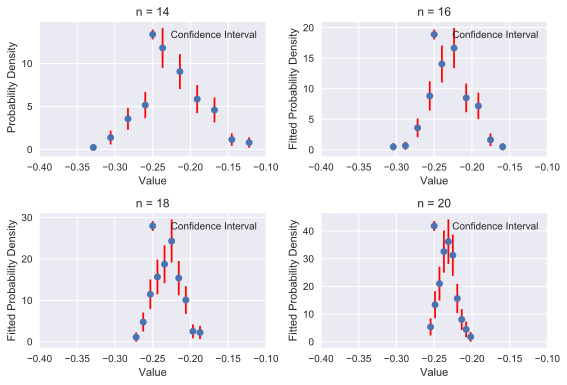

In [39]:
point_even = []
plt.figure(1)
N_sample = 380
plt.subplot(224)
data1 = np.asarray(result[19]).reshape(-1)
N1, bins1, patches = ax1.hist(data1)
error_bar = (2*np.sqrt(N1))/((bins1[1:]-bins1[:-1])*N_sample)
density = (N1/N_sample)/(bins1[1:]-bins1[:-1])
max_id = np.argmax(density)
estimate_bin = (bins1[1:]+bins1[:-1])/2
#estimate_pointdensity = np.mean(density[(estimate_bin>0.6) & (estimate_bin<0.65)])
point_even.append(estimate_bin[max_id])
plt.errorbar((bins1[1:]+bins1[:-1])/2, density, yerr = error_bar,ecolor='red',fmt='o', label="Confidence Interval")
plt.xlabel('Value')
plt.ylabel('Fitted Probability Density')
plt.title('n = 20')
plt.xlim([-0.4,-0.1])
plt.legend()

plt.subplot(223)
data1 = np.asarray(result[17]).reshape(-1)
N1, bins1, patches = ax1.hist(data1)
error_bar = (2*np.sqrt(N1))/((bins1[1:]-bins1[:-1])*N_sample)
density = (N1/N_sample)/(bins1[1:]-bins1[:-1])
max_id = np.argmax(density)
estimate_bin = (bins1[1:]+bins1[:-1])/2
#estimate_pointdensity = np.mean(density[(estimate_bin>0.6) & (estimate_bin<0.65)])
point_even.append(estimate_bin[max_id])
plt.errorbar((bins1[1:]+bins1[:-1])/2, density, yerr = error_bar,ecolor='red',fmt='o', label="Confidence Interval")
plt.xlabel('Value')
plt.ylabel('Fitted Probability Density')
plt.title('n = 18')
plt.xlim([-0.4,-0.1])
plt.legend()

plt.subplot(222)
data1 = np.asarray(result[15]).reshape(-1)
N1, bins1, patches = ax1.hist(data1)
error_bar = (2*np.sqrt(N1))/((bins1[1:]-bins1[:-1])*N_sample)
density = (N1/N_sample)/(bins1[1:]-bins1[:-1])
max_id = np.argmax(density)
estimate_bin = (bins1[1:]+bins1[:-1])/2
#estimate_pointdensity = np.mean(density[(estimate_bin>0.6) & (estimate_bin<0.65)])
point_even.append(estimate_bin[max_id])
plt.errorbar((bins1[1:]+bins1[:-1])/2, density, yerr = error_bar,ecolor='red',fmt='o', label="Confidence Interval")
plt.xlabel('Value')
plt.ylabel('Fitted Probability Density')
plt.title('n = 16')
plt.xlim([-0.4,-0.1])
plt.legend()

plt.subplot(221)
data1 = np.asarray(result[13]).reshape(-1)
N1, bins1, patches = ax1.hist(data1)
error_bar = (2*np.sqrt(N1))/((bins1[1:]-bins1[:-1])*N_sample)
density = (N1/N_sample)/(bins1[1:]-bins1[:-1])
max_id = np.argmax(density)
estimate_bin = (bins1[1:]+bins1[:-1])/2
#estimate_pointdensity = np.mean(density[(estimate_bin>0.6) & (estimate_bin<0.65)])
point_even.append(estimate_bin[max_id])
plt.errorbar((bins1[1:]+bins1[:-1])/2, density, yerr = error_bar,ecolor='red', fmt='o', label="Confidence Interval")
plt.xlabel('Value')
plt.ylabel(' Probability Density')
plt.title('n = 14')
plt.xlim([-0.4,-0.1])
plt.legend()
plt.subplots_adjust(top=1, bottom=0.00, left=0.1, right=0.90, hspace=0.25,
                    wspace=0.45)
plt.tight_layout()
foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('plot_unused2.eps', format='eps',dpi = 1000)
plt.show()

In [40]:
point_even

[-0.23119890503053223,
 -0.22486025439002127,
 -0.22366227949303535,
 -0.2368717947903623]